In [3]:
import cv2
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
#load dataset, currently (x, 2025)
X_train = np.loadtxt(f"X_train")
X_test = np.loadtxt(f"X_test")

#load labels, currently (x, 1)
y_train = np.loadtxt(f"y_train")
y_test = np.loadtxt(f"y_test")

KeyboardInterrupt: 

In [ ]:
# reshape dataset to (x, 45, 45)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1] // 45, 45)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1] // 45, 45)

In [6]:
# for gaussian blur, sigma = 1.5

# add gaussian blur to images
blurred_images_s1 = np.array([gaussian_filter(image, sigma=1.5) for image in X_test_reshaped])

# flatten images to (x, 2025)
flat_s1 = blurred_images_s1.reshape(blurred_images_s1.shape[0], blurred_images_s1.shape[1] * blurred_images_s1.shape[2])

# sharpen images to black or white, no gray
sharpened_images_s1 = np.where(flat_s1 < 230, 0, 255)

# reshape images to (x, 45, 45)
sharpened_images_s1 = sharpened_images_s1.reshape(sharpened_images_s1.shape[0], 45, 45)

print(sharpened_images_s1.shape)


(48813, 45, 45)


In [7]:
# for gaussian blur, sigma = 2.0

# add gaussian blur to images
blurred_images = np.array([gaussian_filter(image, sigma=1.0) for image in X_test_reshaped])

# flatten images to (x, 2025)
flat_2 = blurred_images.reshape(blurred_images.shape[0], blurred_images.shape[1] * blurred_images.shape[2])

# sharpen images to black or white, no gray
sharpened_images_s2 = np.where(flat_2 < 200, 0, 255)

# reshape images to (x, 45, 45)
sharpened_images_s2 = sharpened_images_s2.reshape(sharpened_images_s2.shape[0], 45, 45)

print(sharpened_images_s2.shape)

(48813, 45, 45)


In [9]:
# combine datasets
additional = np.concatenate((sharpened_images_s1, sharpened_images_s2))
X_test_reshaped_new = np.concatenate((X_test_reshaped, additional))

# reshape to (x, 2025)
X_test_new = X_test_reshaped_new.reshape(X_test_reshaped_new.shape[0], X_test_reshaped_new.shape[1] * X_test_reshaped_new.shape[2])

print("expected number datapints: ", X_test.shape[0] * 3)
print(X_test_new.shape)

(292877, 2025)


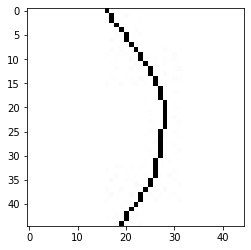

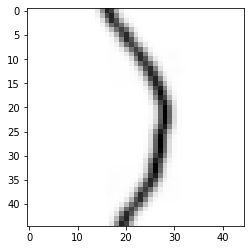

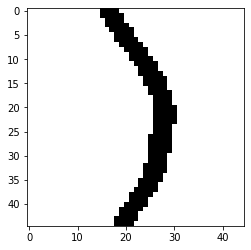

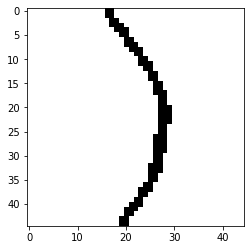

In [91]:
# display to be sure

plt.imshow(1 - X_test_reshaped[91],cmap=plt.cm.binary)
plt.show()

plt.imshow(1 - blurred_images[91],cmap=plt.cm.binary)
plt.show()

plt.imshow(1 - sharpened_images_s1[91],cmap=plt.cm.binary)
plt.show()

plt.imshow(1 - sharpened_images_s2[91],cmap=plt.cm.binary)
plt.show()